In [2]:
# import libraries for reading in files
import matplotlib.pyplot as plt
import numpy as np

Reading CZI Files

In [3]:
import czifile

image_path = r'images\Dox_FRAP_24.czi'

# read in the czi file in as an array, and clean off the metadata
image = czifile.CziFile(image_path)

print(image.shape)
print(image.axes)

image = image.asarray()

image_squeezed = np.squeeze(image)

print(image_squeezed.shape)

# take just the first frame of the time course image
green_channel = image_squeezed[0, :, :]

print(green_channel)

(1, 40, 1, 1, 397, 397, 1)
HTCZYX0
(40, 397, 397)
[[3 4 3 ... 0 0 0]
 [3 3 4 ... 0 0 0]
 [3 4 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Read CZI files files with aicspylibczi

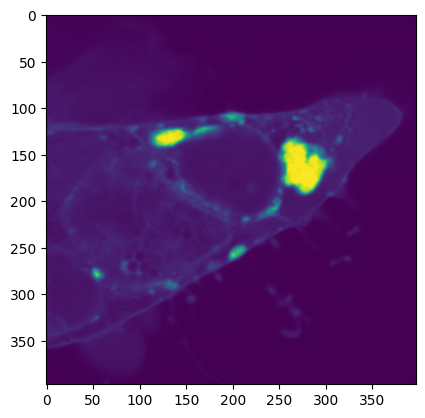

In [4]:
from aicspylibczi import CziFile   

czifile = CziFile(image_path)
image = czifile.read_image(S=1)[0]
image_squeezed = np.squeeze(image) 

image = image_squeezed[1]

plt.imshow(image)
plt.show()

reading in LSM files 

(2, 2116, 2116)


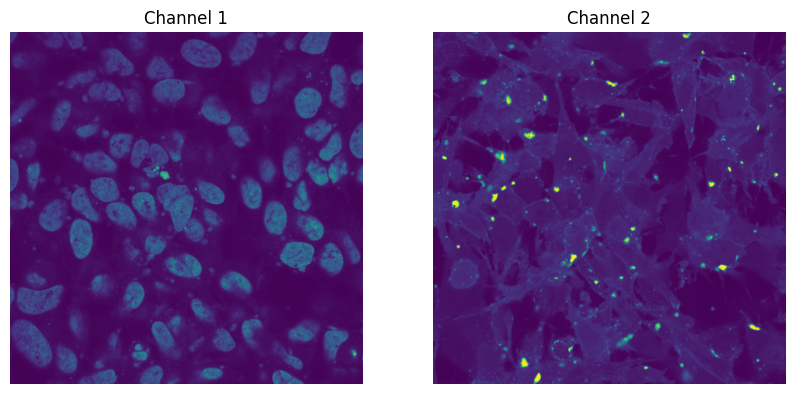

In [6]:
import tifffile

# Read the LSM file

lsmFile = r'images\ADAMTS19_Day1Dox_Day2Transf_1.lsm'

# with tifffile.TiffFile(lsmFile) as lsm:
#     # Access image data as a NumPy array
#     lsmArray = lsm.asarray() 

lsm_image = tifffile.TiffFile(lsmFile)

lsmArray = lsm_image.asarray()

# in shape, 2 represents channel, then has the x and y dimensions
print(lsmArray.shape) 
# plot the image
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
# Plot each frame
axes[0].imshow(lsmArray[0, :, :])
axes[0].set_title('Channel 1')
axes[0].axis('off')

axes[1].imshow(lsmArray[1, :, :])
axes[1].set_title('Channel 2')
axes[1].axis('off')
plt.show()


Reading .lif (leica image file) into python

'LifImage object with dimensions: Dims(x=2144, y=1000, z=268, t=1, m=1)'
(1000, 2144)


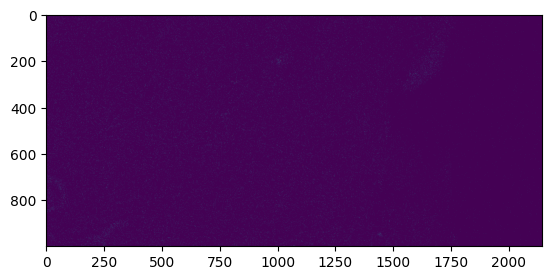

In [ ]:
# import readlif to read in .lif files
import readlif
import numpy as np
from readlif.reader import LifFile
lifFile = r'images\24Dtol056syb1expanded-005.lif'

# lif files can store a collection of images in a single file - get image selects the image in the file
lifImage = LifFile(lifFile).get_image(3)
print(lifImage)

# get frame specifices the z, t, c vars in that specific image - produces a 2D pillow image object
lifFrame = lifImage.get_frame()
# convert the pillow object to a numpy array
lif_array = np.array(lifFrame)
print(lif_array.shape)
plt.imshow(lif_array)
plt.show()

Reading in .ND2 - Nikon confocal files

(3, 998, 998)


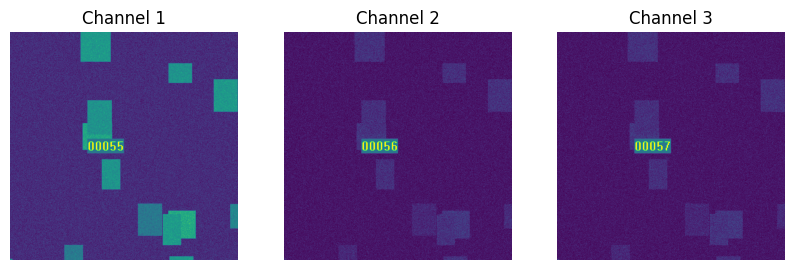

In [9]:
import nd2

# using sample data from the nd2 library
nd2File = r'data\2d_3channel.nd2'
# Read the entire ND2 file into a NumPy array
nd2Array = nd2.imread(nd2File)
# print the dimensions of the array
print(nd2Array.shape)
# print each channel
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
# Plot each frame
axes[0].imshow(nd2Array[0, :, :])
axes[0].set_title('Channel 1')
axes[0].axis('off')

axes[1].imshow(nd2Array[1, :, :])
axes[1].set_title('Channel 2')
axes[1].axis('off')

axes[2].imshow(nd2Array[2, :, :])
axes[2].set_title('Channel 3')
axes[2].axis('off')
plt.show()


Reading in .OIR - Olympus confocal files

Example for reading in TIFF files

(1024, 1024)


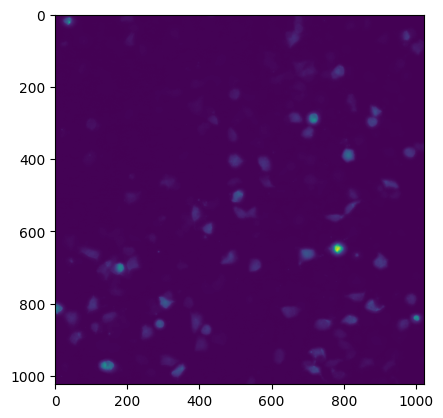

In [14]:
import tifffile

# Read the LSM file

tifFile = r'data\test_scan2_A - 1(fld 01 wv Blue - FITC).tif'

with tifffile.TiffFile(tifFile) as tifImage:
    # Access image data as a NumPy array
    tifArray = tifImage.asarray() 

print(tifArray.shape)

plt.imshow(tifArray)
plt.show()